In [1]:
import pandas as pd
from drn_interactions.transforms.spikes import SpikesHandler
from drn_interactions.config import Config
from drn_interactions.stats import auc, p_adjust
from drn_interactions.interactions.popcup import PopulationCoupling
from drn_interactions.interactions.preprocessors import InteractionsPreprocessor
from drn_interactions.interactions.loaders import StateInteractionsLoader
from drn_interactions.interactions.pairwise import PairwiseCorr, PairwisePartialCorr
from drn_interactions.interactions.runners import InteractionsRunner
from drn_interactions.io import load_derived_generic, load_neurons
from scipy.stats import zscore
from pingouin import pcorr

from drn_interactions.io import load_derived_generic

In [2]:
sessions = load_derived_generic("eeg_states.csv").query("quality == 'good'")["session_name"].unique()

In [3]:
# sessions = load_neurons()["session_name"].unique()
session = sessions[3]

loader = StateInteractionsLoader(state="act", session_name=session)
preprocessor = InteractionsPreprocessor(z=True)
pcorr = PairwisePartialCorr()
corr = PairwiseCorr()
pcup = PopulationCoupling()

runner = InteractionsRunner(loader=loader, preprocessor=preprocessor, pcup=pcup, corr=corr, pcorr=pcorr)

In [4]:
spikes = loader()
spikes = preprocessor(spikes)

In [10]:
pcorr_frames = []
corr_frames = []
pcup_frames = []
for state in ("sw", "act"):
    loader = StateInteractionsLoader(state=state, session_name=session)
    runner = InteractionsRunner(
        loader=loader, 
        preprocessor=preprocessor, 
        pcup=pcup, 
        corr=corr, 
        pcorr=pcorr
        )
    pcorr_frames.append(runner.run_pcorr_multi(sessions=sessions).assign(state=state))
    corr_frames.append(runner.run_corr_multi(sessions=sessions).assign(state=state))
    pcup_frames.append(runner.run_pcup_multi(sessions=sessions).assign(state=state))

df_pcorr = pd.concat(pcorr_frames).reset_index()
df_corr = pd.concat(corr_frames).reset_index()
df_pcup = pd.concat(pcup_frames).reset_index()

<AxesSubplot:xlabel='state', ylabel='mag'>

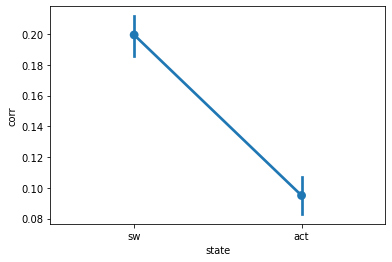

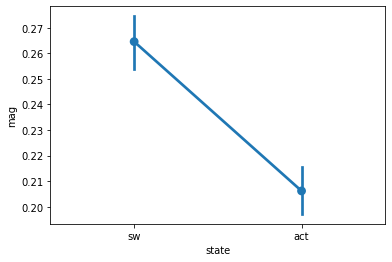

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.pointplot(data=df_corr, x="state", y="corr")
plt.figure()
sns.pointplot(data=df_corr.assign(mag=lambda x: x["corr"].abs()), x="state", y="mag")

<AxesSubplot:xlabel='state', ylabel='mag'>

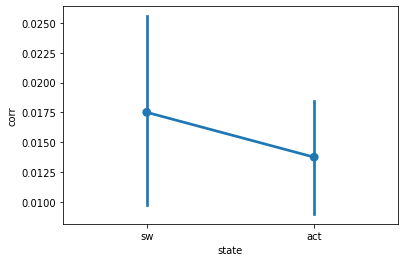

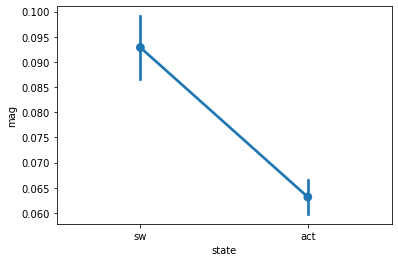

In [13]:
plt.figure()
sns.pointplot(data=df_pcorr, x="state", y="corr")
plt.figure()
sns.pointplot(data=df_pcorr.assign(mag=lambda x: x["corr"].abs()), x="state", y="mag")

<AxesSubplot:xlabel='state', ylabel='mag'>

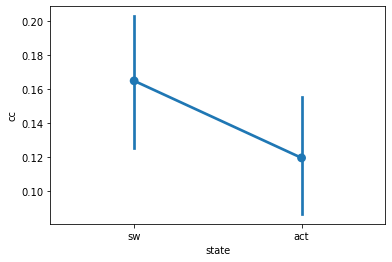

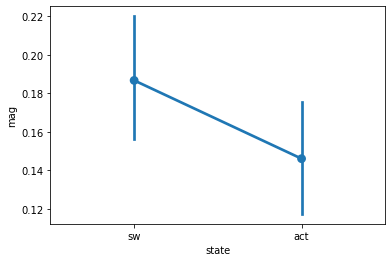

In [15]:
plt.figure()
sns.pointplot(data=df_pcup, x="state", y="cc")
plt.figure()
sns.pointplot(data=df_pcup.assign(mag=lambda x: x["cc"].abs()), x="state", y="mag")